In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt


%matplotlib inline


In [42]:


def random_walk(n=1000000000):
    start = 0

    for i in range(n):
        yield start
        if random.random() > 0.75:
            start += 2
        else:
            start -= 1

def take(iter, n):
    out = []

    for i in range(n):
        out.append(next(iter))

    return out


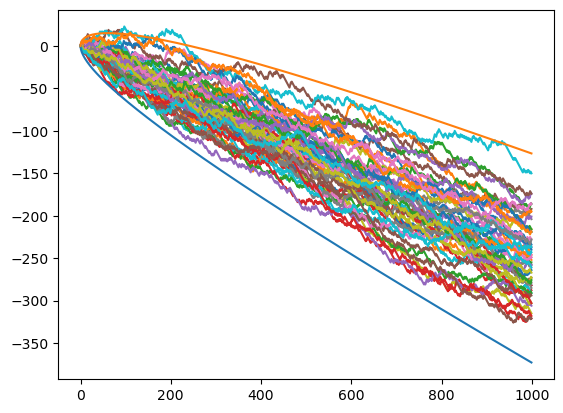

In [43]:

def graph_random_walk():
    xs = np.arange(1000)

    for i in range(50):
        walk = random_walk()
        ys = take(iter(walk), 1000)
        plt.plot(xs, ys)
    
    a = -1
    b = 2
    p = 0.25
    lowerbound = 0 + xs * (b * p + (1-p) * a) - 3 * np.sqrt(xs * (b-a)**2 * p * (1-p))
    upperbound = 0 + xs * (b * p + (1-p) * a) + 3 * np.sqrt(xs * (b-a)**2 * p * (1-p))

    plt.plot(xs, lowerbound)
    plt.plot(xs, upperbound)


def graph_variances():
    xs = np.arange(1000)

    yys = []
    for i in range(20):
        ys = []
        for y in random_walk(1000):
            ys.append(y**2)
        plt.plot(xs, ys)

graph_random_walk()